# SUMMER ANALYTICS 2021

## WEEK-4 ASSIGNMENT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Let's explore the dataset shall we?
Music conoeisseurs have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.

In this notebook we will go through an in depth analysis of sound and how we can **classify and ultimately understand** it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow! 

**Note**: Pay close attention to the markdown cells and the comments.

In [2]:
# Read the csv file as data
data = pd.read_csv('SA2021_W4_Music.csv')
# you may print first few rows
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
data.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

#### 0. What is the shape of the dataset?

Expected Output : (9990, 59)

In [4]:
#YOUR CODE HERE
data.shape

data.label.values


array(['blues', 'blues', 'blues', ..., 'rock', 'rock', 'rock'],
      dtype=object)

## Since we now know basic EDA, let's try to visualize this dataset:

1. #### Plot Correlation heatmap for all the mean variables [Columns based on Mean]:



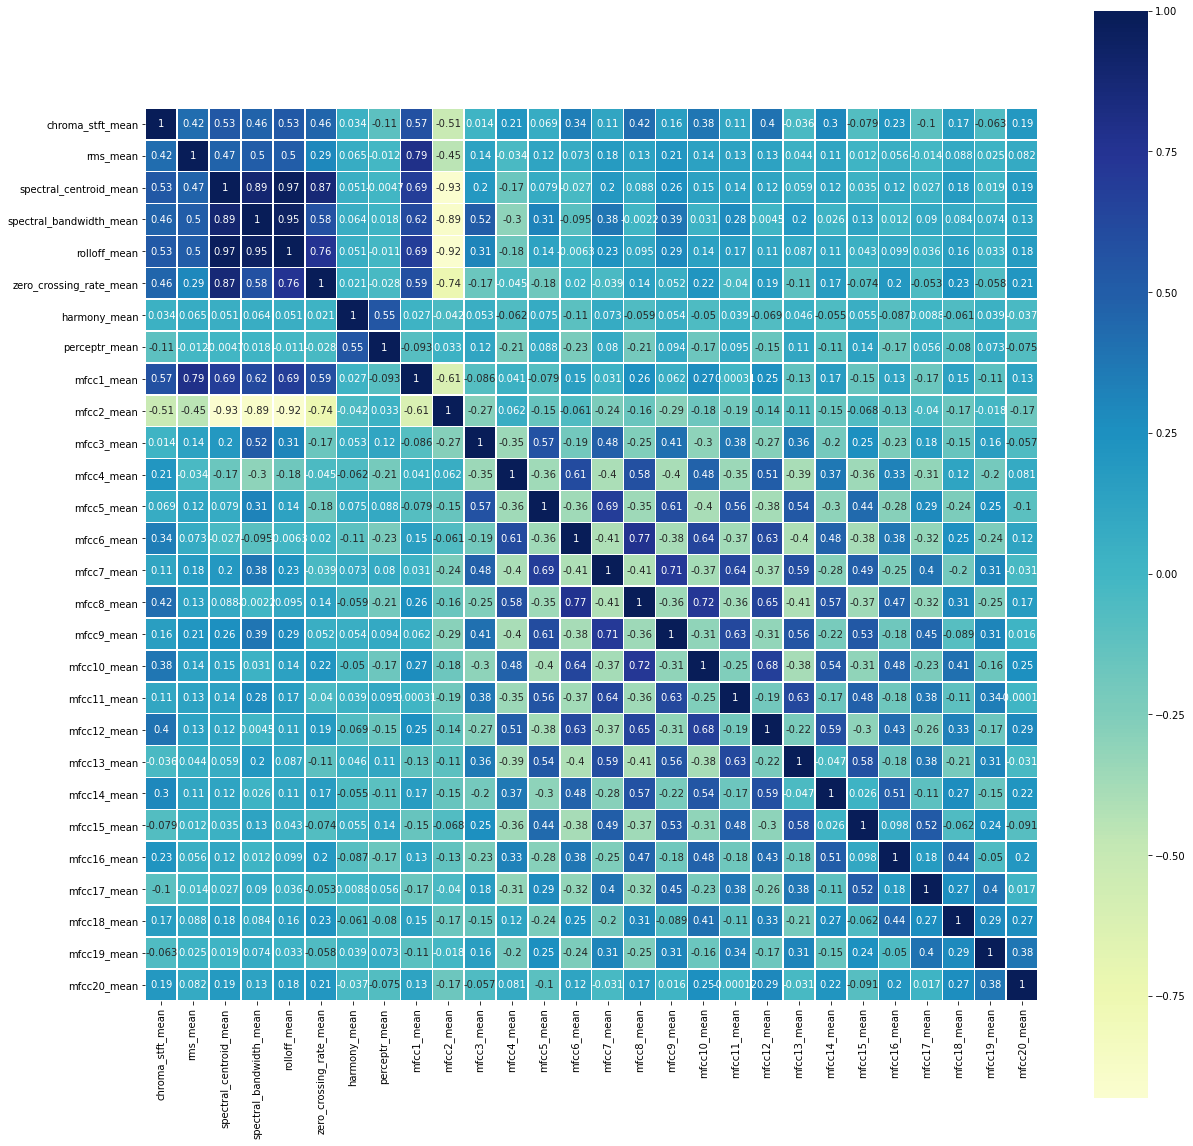

In [5]:
# Cell to plot heatmap. A few lines to get you started.

cols = [col for col in data.columns if 'mean' in col]
corr = data[cols].corr()
corr
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=1.0, center=0, cmap="YlGnBu",
                square=True, linewidths=0.5, annot=True
                )
plt.show();

2. #### Draw a Countplot for the labels column

metal        1000
reggae       1000
jazz         1000
pop          1000
blues        1000
disco         999
rock          998
hiphop        998
classical     998
country       997
Name: label, dtype: int64

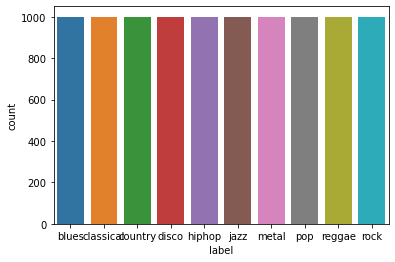

In [6]:
# Cell to plot countplot.
ax = sns.countplot( x =data.label,data=data)
data.label.value_counts()

3. #### Draw a boxplot for the tempo vs labels column. Think carefully about what a boxplot represents.

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [8]:
((data< (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

chroma_stft_mean             39
chroma_stft_var             279
harmony_mean               2175
harmony_var                 533
label                         0
length                        0
mfcc10_mean                  20
mfcc10_var                  408
mfcc11_mean                  47
mfcc11_var                  384
mfcc12_mean                  19
mfcc12_var                  445
mfcc13_mean                  49
mfcc13_var                  470
mfcc14_mean                  91
mfcc14_var                  475
mfcc15_mean                  84
mfcc15_var                  524
mfcc16_mean                 167
mfcc16_var                  558
mfcc17_mean                 168
mfcc17_var                  582
mfcc18_mean                 208
mfcc18_var                  636
mfcc19_mean                 221
mfcc19_var                  655
mfcc1_mean                  319
mfcc1_var                   442
mfcc20_mean                 280
mfcc20_var                  676
mfcc2_mean                  119
mfcc2_va

<AxesSubplot:xlabel='tempo', ylabel='label'>

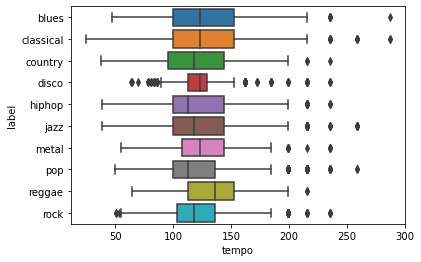

In [9]:
# Cell to plot boxplot. A few lines to get you started.

sns.boxplot(x='tempo',y='label',data=data)

Again, understand what a boxplot exactly represents. (Outlier analysis)

### Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [10]:
# These are the import statements referred to below:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Documentation of each model. You can refer to there whenever stuck.

GaussianNB: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html <br>
LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br>
DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html <br>
RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br>
XGBoost: https://xgboost.readthedocs.io/en/latest/ <br>
AdaBoostClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html <br>

In [11]:
data = pd.read_csv(f'SA2021_W4_Music.csv')
data.head()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Preprocess the data.

Be careful when you play around with the cell below. Your final outputs depend on this.

In [12]:
# DO NOT EDIT THIS CELL

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape) #Why did the shape change? What happened?

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

SHAPE: (3442, 59)


Also pay attention to the preprocessing step. What did we exactly do?

### Splitting the dataset: Do you know what stratify does?

In [13]:
# DO NOT EDIT THIS CELL

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

### Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [14]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

This function trains/fits the model by itself. Just pass the model as shown below.

### Let's see how a basic Logistic Regressor works on this!

In [15]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.74493 



The accuracy hovers around 74%. Do you think you can beat this? The kaggle microcourses would've surely taught you more than this!

#### Now it's your turn. Train the following: 

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters. Do **NOT** change these values 

In [16]:
# AdaBoostClassifier
#YOUR CODE HERE
params = {'n_estimators': 1000,
         'random_state':0}
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(clf,"AdaBoost")

Accuracy for AdaBoost : 0.32464 



In [17]:
# Random Forest
#YOUR CODE HERE
clf1 = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(clf1,"RandomForest")

Accuracy for RandomForest : 0.84348 



AdaBoost performs poorly, but Random Forest looks great!

#### Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.

We suggest going through their documentations before using them.

In [ ]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE

# KNN: KNeighborsClassifier
#YOUR CODE HERE

# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE


6. Did you beat the score yet? Chances are you couldn't. Prove us wrong! Use **XGBClassifier** with n_estimators=1000 and learning_rate=0.05

In [18]:
# XGBClassifier
#YOUR CODE HERE
clf2=XGBClassifier(n_estimators=1000 ,learning_rate=0.05)
score(clf2,"SGB")

[14:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for SGB : 0.87246 



You should've beaten the score by now. Now, heres a task for you. Try **XGBRFClassifier** on your own.

In [19]:
# XGBRFClassifier
#YOUR CODE HERE
clf3=XGBRFClassifier(n_estimators=1000 ,learning_rate=0.1)
score(clf3,"XGBRF")

[14:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGBRF : 0.7913 



### Till now, it looks like XGBClassifier performs the best. Let's experiment with it a bit more.

7. Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.05

In [24]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE


8. Find the feature importance for XGBClassifier. 

*Hint: It's an inbuilt member variable*

In [23]:
# Cell to find Feature Importance
#YOUR CODE HERE


